In [1]:
"""
 we are going to use the Wine dataset to illustrate different 
performance metrics for our algorithms.

You can find more info about it here: https://archive.ics.uci.edu/ml/datasets/wine
"""
from sklearn.datasets import load_wine

# To randomly split the data into train/test 
from sklearn.model_selection import train_test_split

"""
We will compare the performance of all of the classifiers we have seen
so far in previous weeks, so we import them all
"""

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB  # I will just use one of the Naive Bayes we know about

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
"""
We are not going to do any optimisation or tuning on them, so let's just use them
with their default options. We will save the constructor functions for all of them 
in a list (array) called "classifiers", and then call those default constructor
functions and save their instantiation (objects) in a list called "models"
Note: You can have seen many different parameters
for all of these classifiers, so feel free to tune them by adding some parameters to
these constructors.
"""
classifiers = [LogisticRegression, KNeighborsClassifier, MultinomialNB, 
               DecisionTreeClassifier, RandomForestClassifier]

models = [classifier() for classifier in classifiers]

In [26]:
"""
We will download the dataset, we will note the input features and the target
that we are going to classify (in this case we have 3 classes)
"""
wine_data = load_wine(return_X_y=False, as_frame=True)
wine_data = wine_data.frame # We just take the Pandas DataFrame from the data
input_features = list(wine_data.columns[:-1]) # All of the columns, apart from the last one, are input features - the last column is the target feature
wine_data  # We can display the data like this

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [4]:
"""
We will split the data into a train dataset (which 
we will use to train/fit our models) and a test dataset (which we will use to test 
them -> AND to evaluate their performance a little bit better than with just the accuracy)
"""
PERCENTAGE_SAMPLES_USED_FOR_TESTING = 0.4

train, test = train_test_split(wine_data, test_size=PERCENTAGE_SAMPLES_USED_FOR_TESTING)
print('We are using', len(train),'samples for training the', len(models),'models and',len(test),'samples for testing them later.')

We are using 106 samples for training the 5 models and 72 samples for testing them later.


In [5]:
"""
Now we can train all of our models in a loop
"""
for m in models:
    m.fit(train[input_features], train['target'])
    
"""
And once they are fit (trained) we can then use them to make predictions/estimations for
the test data samples, and compare those predictions/estimations with the "real" target
values in the test data.
Here I will use the score function, that calculates the accuracy (from 0 to 1 where 0 is
0% accurate and 1 is 100% accurate - i.e. it guessed correctly all of the test samples).


Note: You might get some warning for some algorithm, because we are not tuning them and
the default parameters not always work - feel free to tune it or let's just go with
whatever accuracy.
"""
for m in models:
    score = m.score(test[input_features], test['target'])
    print(str(m), ": ",score)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() :  0.9305555555555556
KNeighborsClassifier() :  0.6527777777777778
MultinomialNB() :  0.8611111111111112
DecisionTreeClassifier() :  0.8611111111111112
RandomForestClassifier() :  0.9861111111111112


In [6]:
"""
Let's look at their balanced accuracies, to understand what they are doing well and wrong...
"""
from sklearn.metrics import balanced_accuracy_score

for m in models:
    predictions = m.predict(test[input_features])
    print()
    print("Balanced Accuracy Scores for", str(m), ":")
    balanced_accuracies = balanced_accuracy_score(test['target'], predictions)
    print(balanced_accuracies)



Balanced Accuracy Scores for LogisticRegression() :
0.9237373737373739

Balanced Accuracy Scores for KNeighborsClassifier() :
0.6515151515151515

Balanced Accuracy Scores for MultinomialNB() :
0.8585858585858586

Balanced Accuracy Scores for DecisionTreeClassifier() :
0.8727272727272727

Balanced Accuracy Scores for RandomForestClassifier() :
0.9888888888888889


In [8]:
"""
Those accuracies don't tell us much about what classes perform better than others...
So let's look at the Confusion Matrices
"""
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for m in models:
    predictions = m.predict(test[input_features])
    # cm will be a list of lists (matrix), with the values of the confusion matrix...
    cm = confusion_matrix(test['target'], predictions, labels=m.classes_)
    print()
    print("Confusion matrix for", str(m), ":")
    print(cm)


Confusion matrix for LogisticRegression() :
[[17  3  0]
 [ 1 29  0]
 [ 0  1 21]]

Confusion matrix for KNeighborsClassifier() :
[[16  0  4]
 [ 1 21  8]
 [ 0 12 10]]

Confusion matrix for MultinomialNB() :
[[16  3  1]
 [ 2 26  2]
 [ 0  2 20]]

Confusion matrix for DecisionTreeClassifier() :
[[20  0  0]
 [ 3 24  3]
 [ 1  3 18]]

Confusion matrix for RandomForestClassifier() :
[[20  0  0]
 [ 0 29  1]
 [ 0  0 22]]


Confusion Matrix for  LogisticRegression()


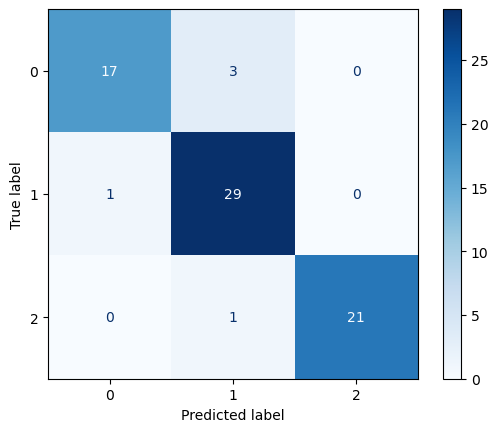

In [15]:

# ... however it's better to just plot it out to visualise it.
# In one function we're doing the predictions in the test set and plotting them:

# We are doing them one by one in different cells:
print("Confusion Matrix for ", str(models[0]))
ConfusionMatrixDisplay.from_estimator(models[0], 
                      X=test[input_features], 
                      y=test['target'], 
                      labels=models[0].classes_,
                      cmap='Blues') # we changed the colormap to something less psychodelic than the default

Confusion Matrix for  KNeighborsClassifier()


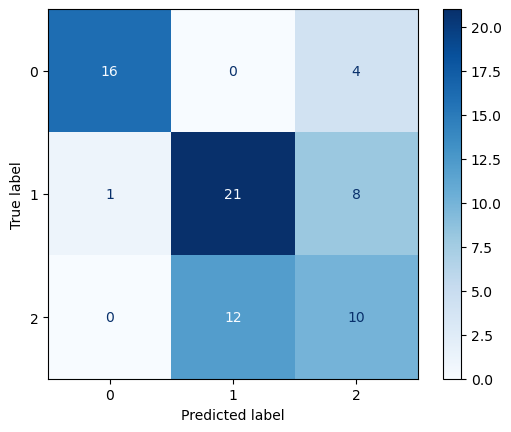

In [16]:
print("Confusion Matrix for ", str(models[1]))
ConfusionMatrixDisplay.from_estimator(models[1], 
                      X=test[input_features], 
                      y=test['target'], 
                      labels=models[1].classes_,
                      cmap='Blues') #We changed the colormap to something less psychodelic than the default

Confusion Matrix for  MultinomialNB()


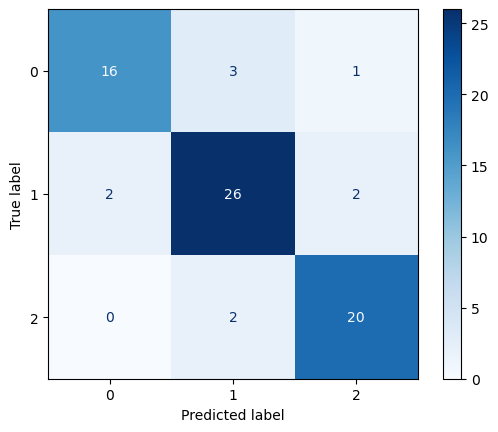

In [17]:
print("Confusion Matrix for ", str(models[2]))
ConfusionMatrixDisplay.from_estimator(models[2], 
                      X=test[input_features], 
                      y=test['target'], 
                      labels=models[2].classes_,
                      cmap='Blues') # We  changed the colormap to something less psychodelic than the default

Confusion Matrix for  DecisionTreeClassifier()


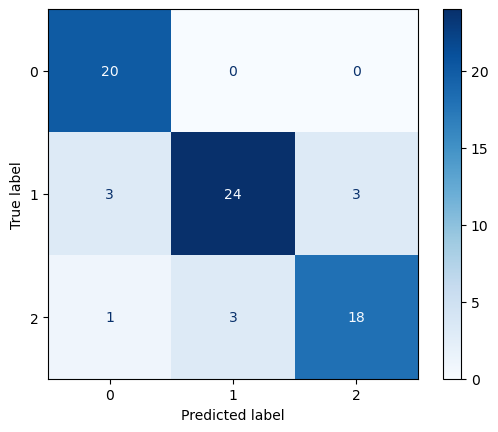

In [18]:
print("Confusion Matrix for ", str(models[3]))
ConfusionMatrixDisplay.from_estimator(models[3], 
                      X=test[input_features], 
                      y=test['target'], 
                      labels=models[3].classes_,
                      cmap='Blues') # We did the same, we changed the colormap to something less psychodelic than the default

Confusion Matrix for  RandomForestClassifier()


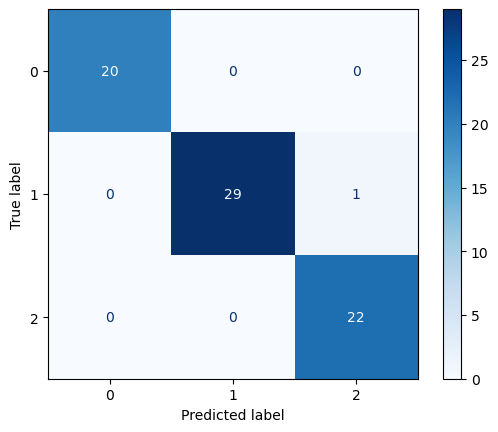

In [19]:
print("Confusion Matrix for ", str(models[4]))
ConfusionMatrixDisplay.from_estimator(models[4], 
                      X=test[input_features], 
                      y=test['target'], 
                      labels=models[4].classes_,
                      cmap='Blues') # the colormap to something less psychodelic than the default

Note: The Confusion Matrices above whose diagonals are darker mean that they are better models. You can also see in them which classes your models are predicting better than others. 

The data is randomised so maybe this is not the case for you but in some of the runs it seems like KNN is struggling with Wine Type 2 (class "2"). And this is what mainly causes its low performance. RandomForest on the other hand is always predicting class "2" correctly, and its mistakes come from confusing classes "0" and "1"

In [11]:
"""
Let's calculate again the confusion matrices, but this time normalised:

Then, the diagonal of the confusion matrix are the accuracies for each class!!
So we can calculate the Balance Accuracy in this way, which is relatively simple:
  * First calculate each class' individual accuracy
  * Then average those individual class accuracies

"""
for m in models:
    predictions = m.predict(test[input_features])
    # cm will be a list of lists (matrix), with the values of the confusion matrix...
    cm = confusion_matrix(test['target'], predictions, labels=m.classes_, normalize='true')
    print('\n\n')
    print("Confusion matrix for", str(m), ":")
    print(cm)
    print("  * Accuracies per class: ")
    print('    ', list(zip(['Class 0', 'Class 1', 'Class 2'], [round(x, 2) for x in cm.diagonal()])))
    print("  * Balanced Accuracy for ", str(m), ":")
    print('    ', round(sum(cm.diagonal())/len(cm.diagonal()), 4))
    print('(this should be the same balanced score value that we calculated above, using the balanced_accuracy_score function)')




Confusion matrix for LogisticRegression() :
[[0.85       0.15       0.        ]
 [0.03333333 0.96666667 0.        ]
 [0.         0.04545455 0.95454545]]
  * Accuracies per class: 
     [('Class 0', 0.85), ('Class 1', 0.97), ('Class 2', 0.95)]
  * Balanced Accuracy for  LogisticRegression() :
     0.9237
(this should be the same balanced score value that we calculated above, using the balanced_accuracy_score function)



Confusion matrix for KNeighborsClassifier() :
[[0.8        0.         0.2       ]
 [0.03333333 0.7        0.26666667]
 [0.         0.54545455 0.45454545]]
  * Accuracies per class: 
     [('Class 0', 0.8), ('Class 1', 0.7), ('Class 2', 0.45)]
  * Balanced Accuracy for  KNeighborsClassifier() :
     0.6515
(this should be the same balanced score value that we calculated above, using the balanced_accuracy_score function)



Confusion matrix for MultinomialNB() :
[[0.8        0.15       0.05      ]
 [0.06666667 0.86666667 0.06666667]
 [0.         0.09090909 0.90909091]]

try to remember the slides of this session, many classification performance metrics such as precision, recall and f1-score are derived from the Confusion Matrix by counting right and wrong predictions in different ways (false positives, true negatives, etc.).

A very interesting function in sklearn that you can use to get a glance of there metrics, per class, is classification_report. Let's check it out:

In [12]:
from sklearn.metrics import classification_report


for m in models:
    predictions = m.predict(test[input_features])
    print('***** Classification report for ', str(m), '***** ')
    print(classification_report(test['target'], predictions))

***** Classification report for  LogisticRegression() ***** 
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.88      0.97      0.92        30
           2       1.00      0.95      0.98        22

    accuracy                           0.93        72
   macro avg       0.94      0.92      0.93        72
weighted avg       0.93      0.93      0.93        72

***** Classification report for  KNeighborsClassifier() ***** 
              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.64      0.70      0.67        30
           2       0.45      0.45      0.45        22

    accuracy                           0.65        72
   macro avg       0.68      0.65      0.66        72
weighted avg       0.67      0.65      0.66        72

***** Classification report for  MultinomialNB() ***** 
              precision    recall  f1-score   support

   

We can see there how poorly KNN performs in Class 2, across all of the metrics

If you remember from the slides, the precision, recall and f1-score metrics were designed for binary classifiers, so... why does it work in this case with 3 classes?

Well, what sklearn is doing when calculating them per class is "transforming the problem into a binary classifier" by calculating the metrics as: the current class vs all other classes. In this way the problem becomes a binary classifier, whatever the number of classes we have.

We could have also calculated each of these metrics separately. In fact, we could have calculated many other metrics, all of them available in the sklearn.metrics package (check docs here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). I will leave that to you...

### try to do the following:
Can you calculate the precision, recall and f1-scores separately using their corresponding function in the metrics package?


In [13]:
from sklearn.metrics import roc_auc_score

for m in models:
    # We will need the proabilities, so the X axis of the ROC curve can be calculated
    # (i.e. for different thresholds, remember?)
    predictions = m.predict_proba(test[input_features])
    print('***** ROC Area Under the Curve for', str(m), '***** ')
    print(roc_auc_score(y_true=list(test['target']), 
                        y_score=predictions, 
                        multi_class='ovr')
         )

***** ROC Area Under the Curve for LogisticRegression() ***** 
0.9936937136937137
***** ROC Area Under the Curve for KNeighborsClassifier() ***** 
0.8164783364783365
***** ROC Area Under the Curve for MultinomialNB() ***** 
0.9606890331890332
***** ROC Area Under the Curve for DecisionTreeClassifier() ***** 
0.9016383616383618
***** ROC Area Under the Curve for RandomForestClassifier() ***** 
1.0


So RandomForest is not just the classifier with the highest accuracy, but also the one that better differentiates the classes between them!
And remember, ROC works for binary classifiers, so in this multi-class problem we are specifying the OVR strategy: one-vs-rest, that is one class vs the rest of classes, and then average out the AUC scores for all 3 classes.

We could plot those ROC curves so we can visualise the five performances if our classification problem was binary, just by using the code given by sklearn here:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In short: We'd have to apply the one-vs-rest strategy into the classifier (there is a special type of meta-classifier that applies this strategy on top of any other classifier), and then we'd manually plot the data returned by the auc function in the metrics package.

If you ever have a binary classification problem, just do:

```
from sklearn.metrics import plot_roc_curve
plot_roc_curve(models[0], test[input_features], test['target'])
```

However if you run that code here it'll complain that your classifiers are not binary... :(

### Learning exercise:

Finally, note that we also have all of the [Regression success metrics in the `sklearn.metrics` package](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

you can experiment further, if you want to follow these steps: 
1. load the [diabetes data, which is a regression problem](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes),
2. fit and predict a couple of regression models to that data, for example [linear regressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression) and [ridge regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) and 
3. apply some of the popular metrics such as MAE, MSE, RMSE and R^2, available in `sklearn.metrics`. You just need to apply them the same way we did with the more complex classification metrics.